# Time-independent Perturbation Theory

In [1]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

# 1. Semi-infinite chain

## 1.a Getting the analytical value of $G_{11}(z)$
We have a semi-infinite chain of states with hopping parameter $\gamma$, which only acts on the nearest neighbors. In particular we have considered the case when we assume we have solved the semi-infinite chain and we're adding a new state $|1\rangle$ at the origin of the chain. We've found the $11$ matrix element of the Green operator $\hat{G}(z)$ to be:

$$ G_{11}(z) = \frac{z - \varepsilon_1}{2\gamma^2}\left[1-\sqrt{1-\left(\frac{2\gamma}{z-\varepsilon_1}\right)^2}\right]$$

where $\varepsilon_1$ is the eigenvalue of each individual state of the chain when considered as non-interacting.

## 1.b Graphing the real and imaginary parts of $G_{11}(z)$

In [2]:
# Auxiliary plotting function 
def plot_complex_function(X,Y,Z, func_name='$G_{11}(z)$',
                          min_max_vals=[], abs_min_max=[],
                          fname=None, dpi=200, figsize=None,
                          scaled=True, pad=0.05):
    '''
    Params:
        X : numpy array
            1-D numpy array containing the x values of the dominion.   
        Y : numpy array
            1-D numpy array containing the y values of the dominion.
        Z : numpy array
            2-D numpy array containing the image of the complex function
            for the given X and Y arrays. 
        func_name : str (optional)
            Name for the function to be shown in the plot.
        min_max_vals : list (optional)
            List of real values (real_min, real_max, imag_min, imag_max).
            Get's the min/max values from the data when len(min_max_vals)
            is less than 4.
        abs_min_max : list (optional)
            List with min and max values for the absolute values plot of 
            the function, empty by default and get's estimated.
        fname : str or None (optional)
            File path to save the plot, doesn't save if None (default).
        dpi : int (optional)
            Dots per pixel, resolution of the saved plot. Default is 300.
        figsize : tuple of ints or None (optional)
            Figsize of the figure, None by default. This get's ignored 
            when scaled == False.
        scaled : bool (optional)
            Whether to use the 'scaled' option for the axes. This
            overrides the figsize parameter. True by default.
        pad : float (optional)
            Padding for the colorbars, equal to 0.05 by default.
    Output:
        Plots the function Z over the complex dominion X+iY.
    '''
    # Find max and min values
    if len(min_max_vals) < 4:
        max_val_real = np.max(Z.real)
        max_val_imag = np.max(Z.imag)
        min_val_real = np.min(Z.real)
        min_val_imag = np.min(Z.imag)
    else:
        min_val_real, max_val_real, min_val_imag, max_val_imag = min_max_vals
    
    if figsize == None:
        figsize = (13,13)
    Fig1, (ax1, ax2, ax3) = plt.subplots(nrows=1, 
                                         ncols=3, 
                                         figsize=figsize)
    Fig1.set_facecolor("k")
    col1 = ax1.pcolormesh(X, Y, Z.real, shading='auto',
                          vmin=min_val_real,vmax=max_val_real)
    col2 = ax2.pcolormesh(X, Y, Z.imag, shading='auto',
                          vmin=min_val_imag,vmax=max_val_imag)
    if len(abs_min_max) < 2:
        col3 = ax3.pcolormesh(X, Y, np.power(np.abs(Z), 2), 
                          shading='auto')
    else:
        col3 = ax3.pcolormesh(X, Y, np.power(np.abs(Z), 2), 
                          shading='auto',vmin=abs_min_max[0],
                          vmax=abs_min_max[1])
    ax1.set_title('Re['+func_name+']',color='w', fontsize=16)
    ax2.set_title('Im['+func_name+']',color='w', fontsize=16)
    ax3.set_title('$|$'+func_name+'$|^2$',color='w', fontsize=16)
    
    # Place axes labels
    for ax in [ax1, ax2, ax3]:
        if scaled:
            ax.axis('scaled')
        ax.set_xlabel('Re$[z]$', fontsize=14)
    ax1.set_ylabel('Im$[z]$', fontsize=14)
        
    # Place colorbars
    Fig1.colorbar(col1, orientation="horizontal", ax=ax1,
                 pad=pad)
    Fig1.colorbar(col2, orientation="horizontal", ax=ax2,
                 pad=pad)
    Fig1.colorbar(col3, orientation="horizontal", ax=ax3, 
                 pad=pad)
    
    plt.tight_layout()
    if fname != None:
        plt.savefig(fname, dpi=dpi)
        
        
def plot_real_function(X,f, func_name='$f(x)$',
                       xlabel='$x$',
                       fname=None, dpi=200):
    '''
    Params:
        X : numpy array
            1-D numpy array containing the x values of the dominion.   
        f : numpy array
            1-D numpy array containing the image of the real function
            for the given X array. 
        func_name : str (optional)
            Name for the function to be shown in the plot.
        fname : str or None (optional)
            File path to save the plot, doesn't save if None (default).
        dpi : int (optional)
            Dots per pixel, resolution of the saved plot. Default is 300.
    Output:
        Plots the function f over the real dominion X.
    '''
    # Find max and min values
    max_val, min_val = np.max(f), np.min(f)
    
    Fig1, (ax1) = plt.subplots(nrows=1, ncols=1, 
                               figsize=(6,6))
    Fig1.set_facecolor("k")
    ax1.plot(X,f)
    ax1.set_xlabel(xlabel, fontsize=14)
    ax1.set_ylabel(func_name, fontsize=14)
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.tight_layout()
    if fname != None:
        plt.savefig(fname, dpi=dpi)
        
# Let's define the G_11(z) function
def G_11(z, e_1, gamma):
    '''
    Params:
        z : complex
            Independent variable of the function.
        e_1: float or complex
            epsilon_1 parameter of the
            G_11 function, respectively.
        gamma : float or complex
            gamma parameter of the G_11 function.
    Output:
        Returns the value of G_11(z) for the given
        parameters.
    '''
    # Build square root term
    sqrt_term = np.sqrt(1-np.power(2*gamma/(z-e_1),2))
    return (z - e_1)*(1-sqrt_term)/(2*np.power(gamma,2))

def build_XY(L_x_finish, L_y_finish, X_def, Y_def,
            L_x_start=0, L_y_start=0):
    '''
    Params:
        L_x_finish, L_y_finish : int
            X and Y maximum values, respectively.
        X_def, Y_def : int
            X and Y amount of values in the given range, 
            respectively.
        L_x_start, L_y_start : int (optional)
            X and Y starting values, respectively, both are 0
            by default.
    Ouput:
        Returns a tuple (X,Y,x,y), where X and Y are numpy
        linspace returns, and (x,y) are the return of a 
        meshgrid built using X and Y.
    '''
    X = np.linspace(start=L_x_start,stop=L_x_finish,
                    num=X_def)
    Y = np.linspace(start=L_y_start,stop=L_y_finish,
                    num=Y_def)
    x,y = np.meshgrid(X, Y, sparse=True)
    return X,Y,x,y

### Case $\varepsilon_1=\gamma=1$

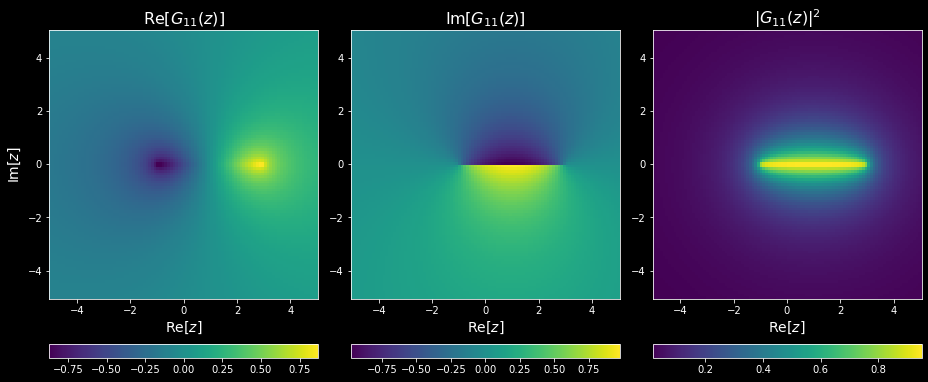

In [4]:
delta_x = 5
delta_y = 5
D = 100
X,Y,x,y = build_XY(delta_x, delta_y, D, D,
                   -delta_x, -delta_y)
plot_complex_function(X,Y,Z=G_11(x+1j*y,1,1))

### Case $\varepsilon_1=1$ and $\gamma\rightarrow0$

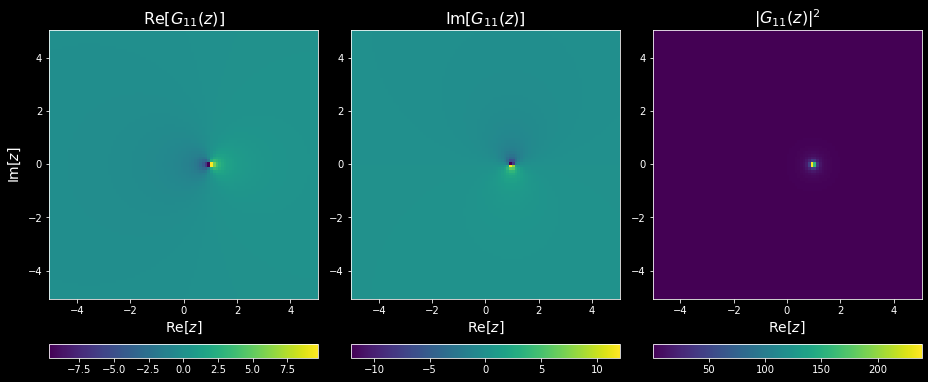

In [9]:
delta_x = 5
delta_y = 5
D = 100
X,Y,x,y = build_XY(delta_x, delta_y, D, D,
                   -delta_x, -delta_y)
plot_complex_function(X,Y,Z=G_11(x+1j*y,1,0.001))

### Case $\varepsilon_1=1$ and $\gamma=2$

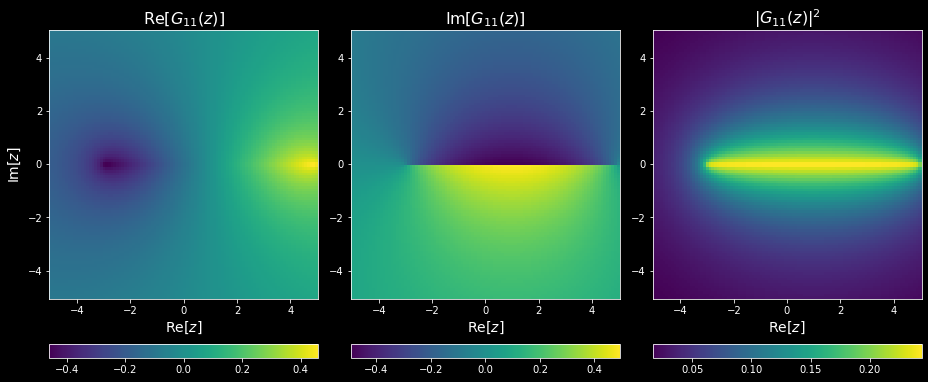

In [11]:
delta_x = 5
delta_y = 5
D = 100
X,Y,x,y = build_XY(delta_x, delta_y, D, D,
                   -delta_x, -delta_y)
plot_complex_function(X,Y,Z=G_11(x+1j*y,1,2)) # This has epsilon_1=1, epsilon_2 = 2

## 1.c Plotting the density of states, $D(\varepsilon)$

Based on $G_{11}(z)$, we know that:

$$D_{11}(\varepsilon) = \frac{-1}{\pi}\Im\lim_{\eta\rightarrow0^{+}} G_{11}(\varepsilon+i\eta)$$

where $\varepsilon\in\mathbb{R}$.

In [12]:
# Define the function for D_11(epsilon)
def D_11(eps, eta, e_1, gamma):
    '''
    Params:
        eps : float
            Epsilon variable of the D_11 function.
        eta : float
            Eta parameter of the limit inside D_11.
        e_1 : float or complex
            Epsilon_1 energy.
        gamma : float or complex
            Gamma parameter of the system.
    Output:
        Returns the D_11 function evaluated at eps,
        considering the given eta.
    '''
    return (-1/np.pi)*np.imag(G_11(eps+1j*eta,e_1,gamma))

### Case 1

We'll use $\eta=0.0001$, $\varepsilon_1=1$, $\gamma=1$.

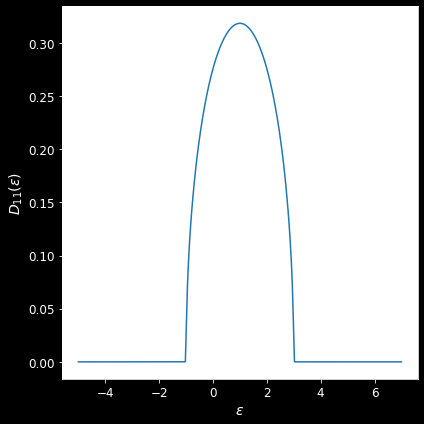

In [36]:
X = np.linspace(start=-5,stop=7,num=300)
plot_real_function(X, 
     D_11(X,eta=0.0001, e_1=1, gamma=1),
     func_name=r'$D_{11}(\varepsilon)$',
     xlabel=r'$\varepsilon$')

### Case 2

We'll use $\eta=0.0001$, $\varepsilon_1=1$, $\gamma=2$.

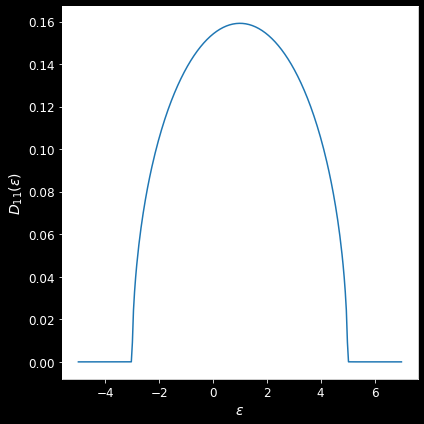

In [35]:
X = np.linspace(start=-5,stop=7,num=300)
plot_real_function(X, 
     D_11(X,eta=0.0001, e_1=1, gamma=2),
     func_name=r'$D_{11}(\varepsilon)$',
     xlabel=r'$\varepsilon$')

# 2. Recursive definition of $G_{11}(z)$

Let's try the recursion method from 
[R Haydock et al 1972 J. Phys. C: Solid State Phys. 5 2845](https://iopscience.iop.org/article/10.1088/0022-3719/5/20/004/pdf):

$$ G_{11}^{(N+1)}(z) = \frac{1}{z - \varepsilon_1 - \gamma^2G_{11}^{(N)}(z)} $$

considering that

$$ G_{11}^{(0)}(z) = \frac{1}{z-\varepsilon_1} $$

In [26]:
def recursive_G_11_Haydock(z,e_1,gamma,N,results=[]):
    '''
    Params:
        z : complex
            z variable of the G_11(z) function.
        e_1 : real or complex
            epsilon_1 parameter of the system.
        gamma : real or complex
            gamma parameter of the system.
        N : int
            Must be N >= 1, amount of orbitals in the 
            chain.
        results : list
            Don't use this parameter! It is used for 
            recursion purposes.
    Output:
        Returns the recursive value of G_11(z)^(N-1) 
        and the values of the previous recurisions as
        a list with the first element being the last
        step of the recursion, and so on. This is done 
        in order to save computational time. The recursive
        definition implemented is the one defined in the
        work by Haydock et. al., at:
        R Haydock et al 1972 J. Phys. C: Solid State Phys. 5 2845
    '''
    # Check if N == 1, if so this is the bottom of the 
    # recursion
    if N == 1:
        results = []
        G_0 = 1/(z-e_1)
        results.append(G_0)
    else:
        results = recursive_G_11_Haydock(z,e_1,gamma,N-1,results=results)
        G_prev = results[-1]
        G_11_N = 1/(z-e_1-(gamma**2)*G_prev)
        results.append(G_11_N)
        
    return results


## 2.a Testing the function

### Case 1

We'll use $\varepsilon_1 = 1$ and $\gamma = 0.5$, and we'll show the results for $N = 1,10,100,1000,2500$.

In [27]:
# Let's plot some examples
e_1, gamma = 1, 0.5
N = 2500
num = 500
# Build dominion
x_min, x_max, y_min, y_max = -1, 5, -1, 1
X, Y = np.linspace(x_min,x_max,num=num), np.linspace(y_min,y_max,num=num)
x,y = np.meshgrid(X, Y, sparse=True)
# Get results
R = recursive_G_11_Haydock(z=x+1j*y,e_1=e_1,gamma=gamma,N=N)

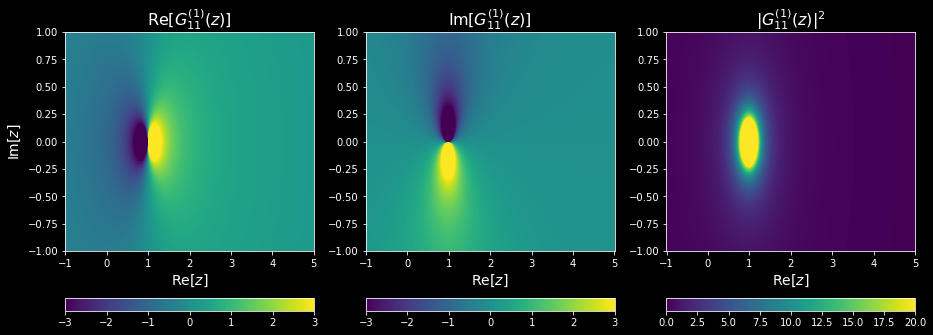

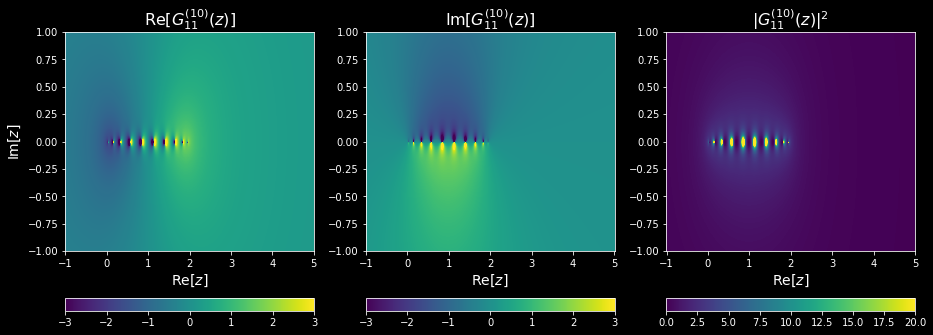

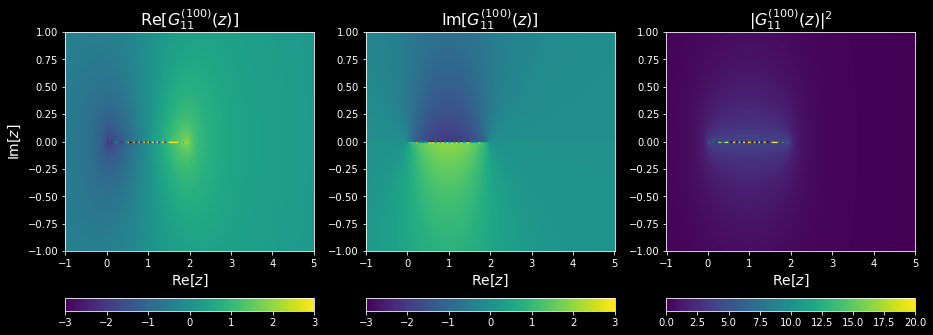

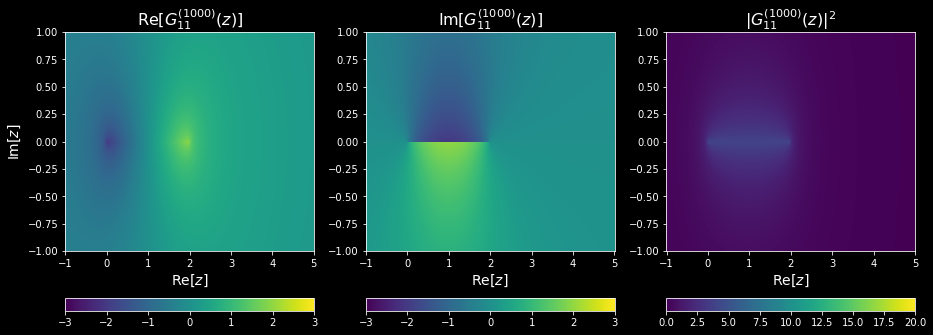

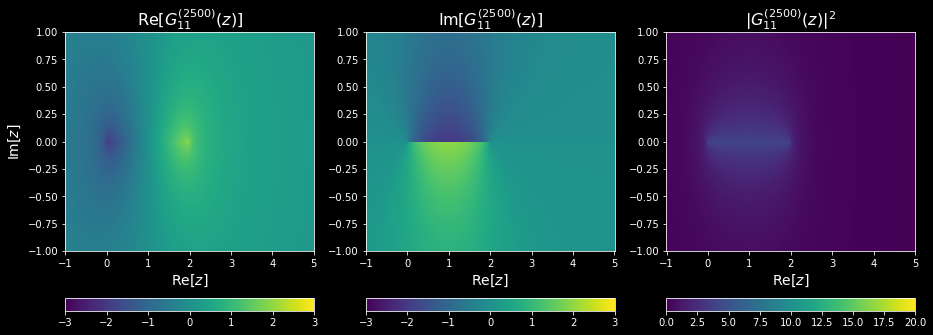

In [28]:
# Plot
for i in [0,9,99,999,2499]:
    plot_complex_function(X,Y,R[i], 
        figsize=(13,5), scaled=False, pad=0.15,func_name=r'$G_{11}^{(%i)}(z)$'%(i+1),
        min_max_vals = [-3,3,-3,3],abs_min_max=[0,20]) 

Let's compare this to our first model, with $\varepsilon_1 = 1$ and $\gamma = 0.5$

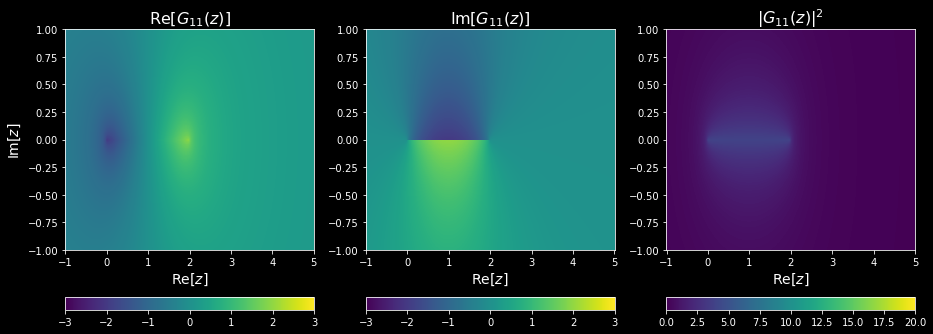

In [49]:
D = 500
X,Y,x,y = build_XY(5, 1, D, D,
                   -1, -1)
plot_complex_function(X,Y,Z=G_11(x+1j*y,1,0.5),
                     figsize=(13,5), scaled=False, pad=0.15,
                     min_max_vals = [-3,3,-3,3],abs_min_max=[0,20])

### Case 2

We'll use $\varepsilon_1 = 2$ and $\gamma = 2$, and we'll show the results for $N = 1,2,5,10$.

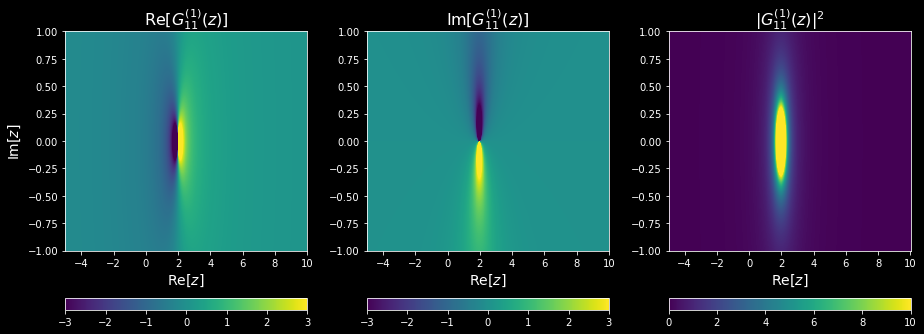

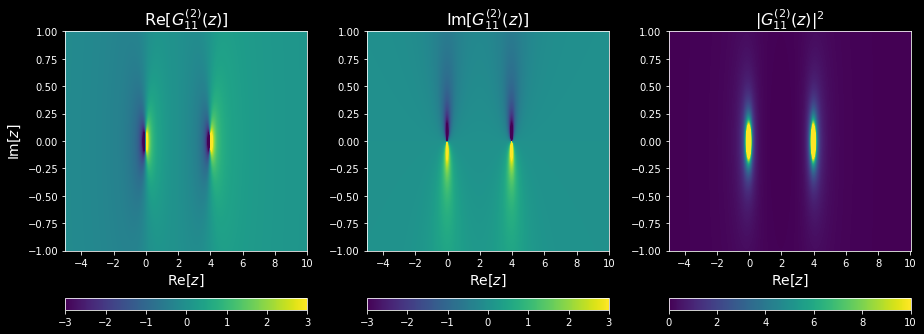

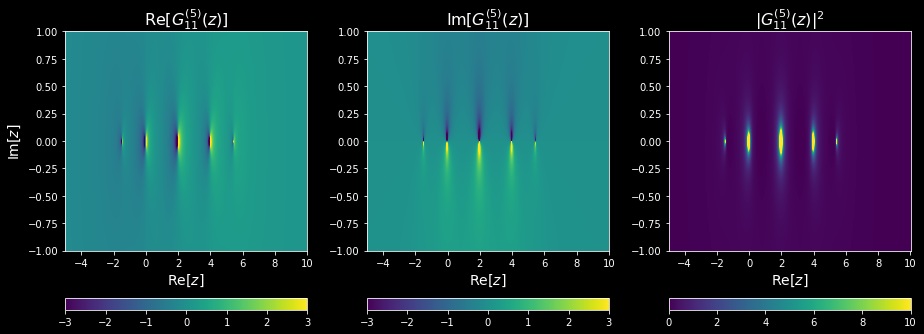

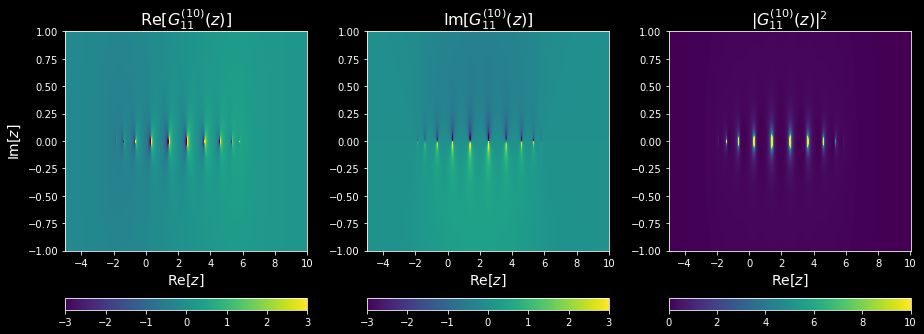

In [29]:
# Let's plot some examples
e_1, gamma = 2, 2
N = 10
num = 1000
# Build dominion
x_min, x_max, y_min, y_max = -5, 10, -1, 1
X, Y = np.linspace(x_min,x_max,num=num), np.linspace(y_min,y_max,num=num)
x,y = np.meshgrid(X, Y, sparse=True)
# Get results
R = recursive_G_11_Haydock(z=x+1j*y,e_1=e_1,gamma=gamma,N=N)
for i in [0,1,4,9]:
    plot_complex_function(X,Y,R[i], 
        figsize=(13,5), scaled=False, pad=0.15,func_name=r'$G_{11}^{(%i)}(z)$'%(i+1),
        min_max_vals = [-3,3,-3,3],abs_min_max=[0,10]) 

# 3. $D_{11}(z)$ for finite chains vs. semi-infinite chain

In [107]:
# Define D_11 for finite chains
def D_11_finite(eps, eta, e_1, gamma, N):
    '''
    Params:
        eps : float
            Epsilon variable of the D_11 function.
        eta : float
            Eta parameter of the limit inside D_11.
        e_1 : float or complex
            Epsilon_1 energy.
        gamma : float or complex
            Gamma parameter of the system.
        N : int
            Number of states in the system.
    Output:
        Returns the D_11 function evaluated at eps,
        considering the given eta for a finite chain
        of N states.
    '''
    return (-1/np.pi)*np.imag(recursive_G_11_Haydock(eps+1j*eta,e_1,gamma, N)[-1])
    
# Define auxiliary plotting function
def plot_multiple_real(X,func_list, func_names=[],
                       xlabel='$x$',ylabel='y',
                       ylims=[],
                       mode='plot',
                       fname=None, dpi=200):
    '''
    Params:
        X : numpy array
            1-D numpy array containing the x values of the dominion.   
        func_list : list of numpy arrays
            List of 1-D numpy arrays containing the images of the 
            real functions for the given X array. 
        func_names : list of str (optional)
            Names for the functions to be shown in the plot.
        xlabel, ylabel : str (optional)
            Label for the x and y axes, respectively.
        ylims : list (optional)
            List with y_min and y_max values, no limits are
            used by default.
        mode : str (optional)
            Plotting mode, either 'plot' (default) or 'scatter'.
        fname : str or None (optional)
            File path to save the plot, doesn't save if None (default).
        dpi : int (optional)
            Dots per pixel, resolution of the saved plot. Default is 300.
    Output:
        Plots the functions over the real dominion X.
    '''
    
    Fig1, (ax1) = plt.subplots(nrows=1, ncols=1, 
                               figsize=(6,6))
    Fig1.set_facecolor("k")
    for i in range(len(func_list)):
        f = func_list[i]
        if len(func_names) == len(func_list):
            label = func_names[i]
        else:
            label=None
        if mode == 'plot':
            ax1.plot(X,f,label=label)
        elif mode == 'scatter':
            ax1.scatter(X,f,label=label)
    ax1.set_xlabel(xlabel, fontsize=14)
    ax1.set_ylabel(ylabel, fontsize=14)
    
    if len(ylims) > 0:
        ax1.set_ylim(bottom=ylims[0],top=ylims[1])
    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    if len(func_names) == len(func_list):
        plt.legend(fontsize=12)
    
    plt.tight_layout()
    if fname != None:
        plt.savefig(fname, dpi=dpi)

## 3.a Comparing for different sizes of chains

### Case 1

Let's plot some examples with $N = 2, 3, 5, 10$. We'll use $\varepsilon_1 = 1$ and $\gamma=1$.

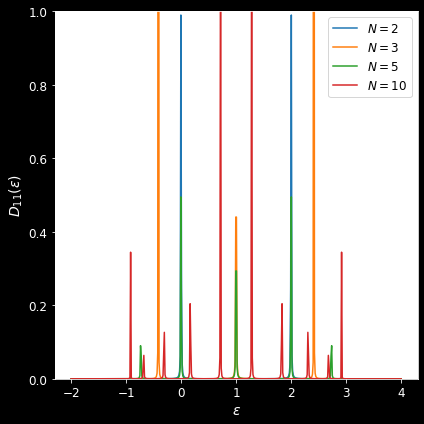

In [108]:
N_1 = [2,3,5,10]
# Build X, functions and names
X_1 = np.linspace(start=-2,stop=4,num=500)
func_list_1 = [
    D_11_finite(X_1,eta=0.0001, e_1=1, gamma=1,N=n) for n in N_1
]
plot_multiple_real(X_1, 
     func_list_1,
     func_names=[r'$N = %d$' % n for n in N_1],
     xlabel=r'$\varepsilon$',
     ylabel=r'$D_{11}(\varepsilon)$',
     ylims=[0,1])

### Case 2

Let's plot some examples with $N = 1000, 2500$ and a semi-infinite chain. We'll use $\varepsilon_1 = 1$ and $\gamma=1$.

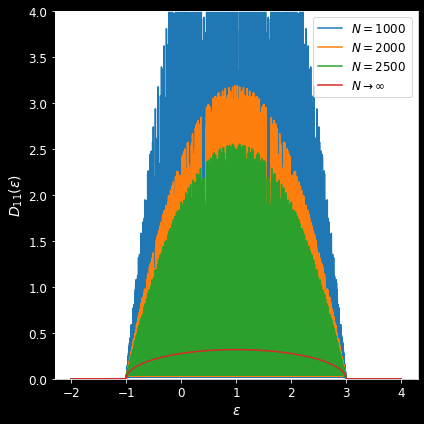

In [125]:
# Build X, functions and names
X_2 = np.linspace(start=-2,stop=4,num=20000)
func_list_2 = [
    D_11_finite(X_2,eta=0.0001, e_1=1, gamma=1,N=1000),
    D_11_finite(X_2,eta=0.0001, e_1=1, gamma=1,N=2000),
    D_11_finite(X_2,eta=0.0001, e_1=1, gamma=1,N=2500),
    D_11(X_2,eta=0.0001, e_1=1, gamma=1)
]
plot_multiple_real(X_2, 
     func_list_2,
     func_names=[r'$N = 1000$',r'$N = 2000$',r'$N = 2500$', 
                 r'$N\rightarrow\infty$'],
     xlabel=r'$\varepsilon$',
     ylabel=r'$D_{11}(\varepsilon)$',
     ylims=[0,4], mode='plot')

We can see how $D_{11}(z)$ for the finite chain starts to converge to the semi-infinite case as $N$ increases.